
Analisis Musim - Metode Dasar:
              count        mean         std      min         25%      50%  \
Musim                                                                       
Musim Hujan  1000.0  322.966749  245.885335  10.6785  124.422375  253.848   

                   75%      max  
Musim                            
Musim Hujan  471.35025  1042.65  

Analisis Musim - Metode BMKG:
                           count        mean         std      min        25%  \
Musim                                                                          
Musim Hujan Puncak         655.0  325.971362  245.902159  10.6785  125.71125   
Transisi Hujan ke Kemarau  345.0  317.262339  246.109322  16.2750  121.12800   

                               50%       75%      max  
Musim                                                  
Musim Hujan Puncak         262.794  482.2125  1042.65  
Transisi Hujan ke Kemarau  237.426  462.2100  1022.49  


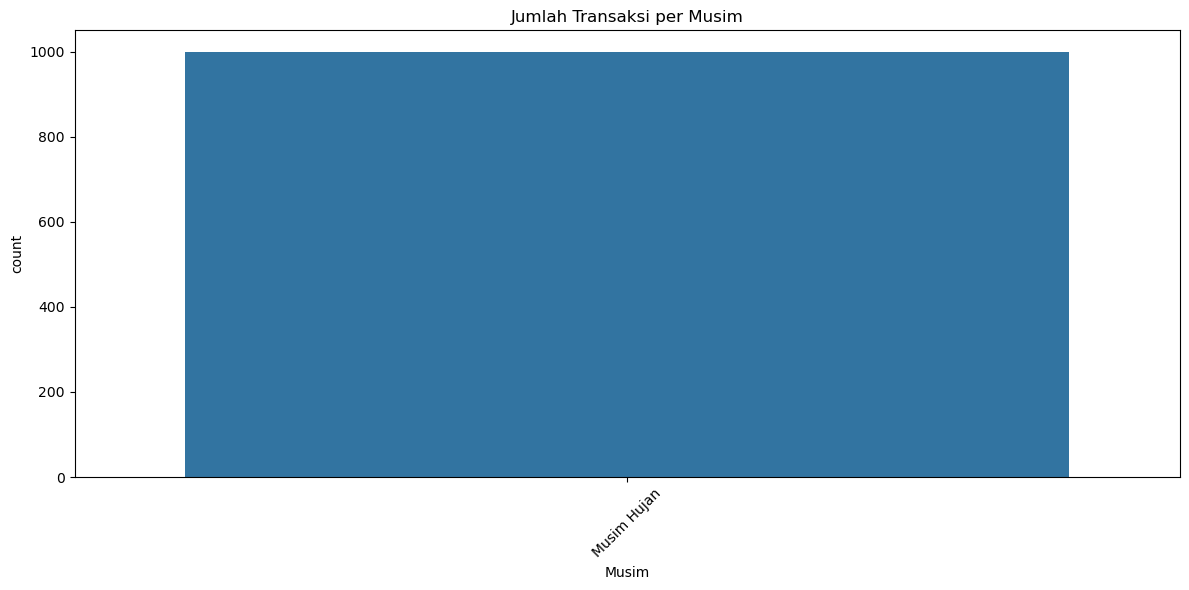

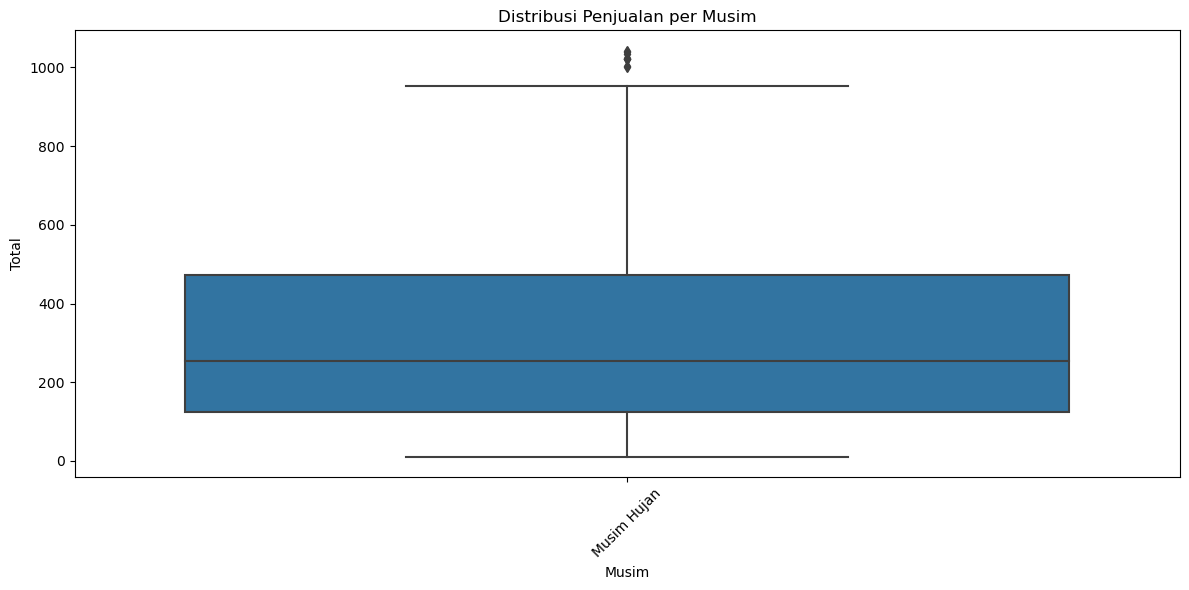

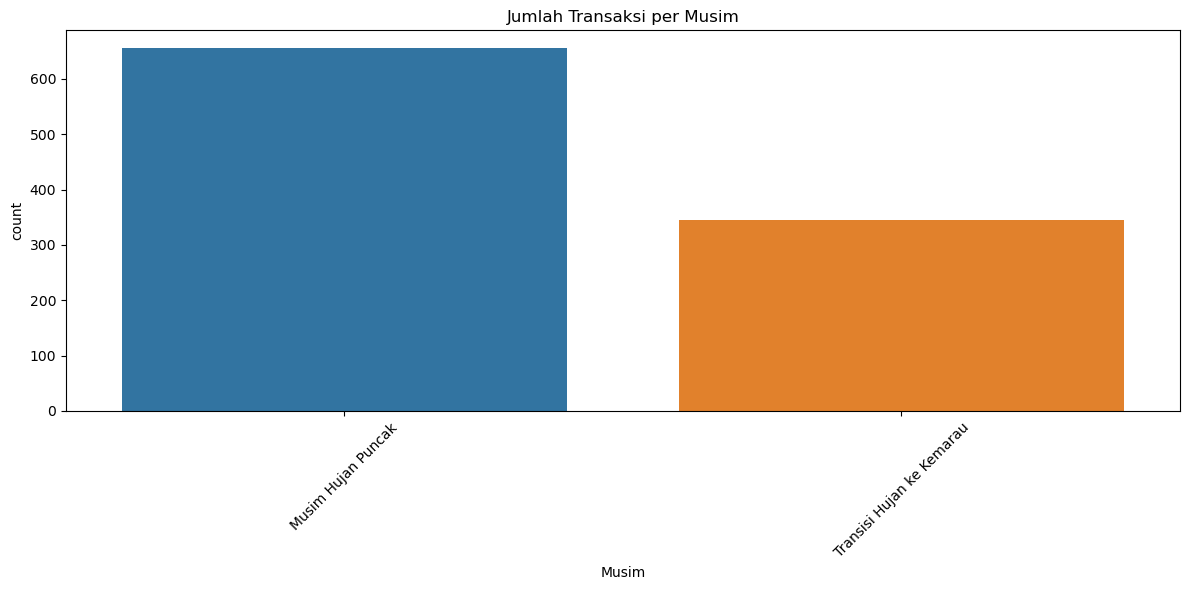

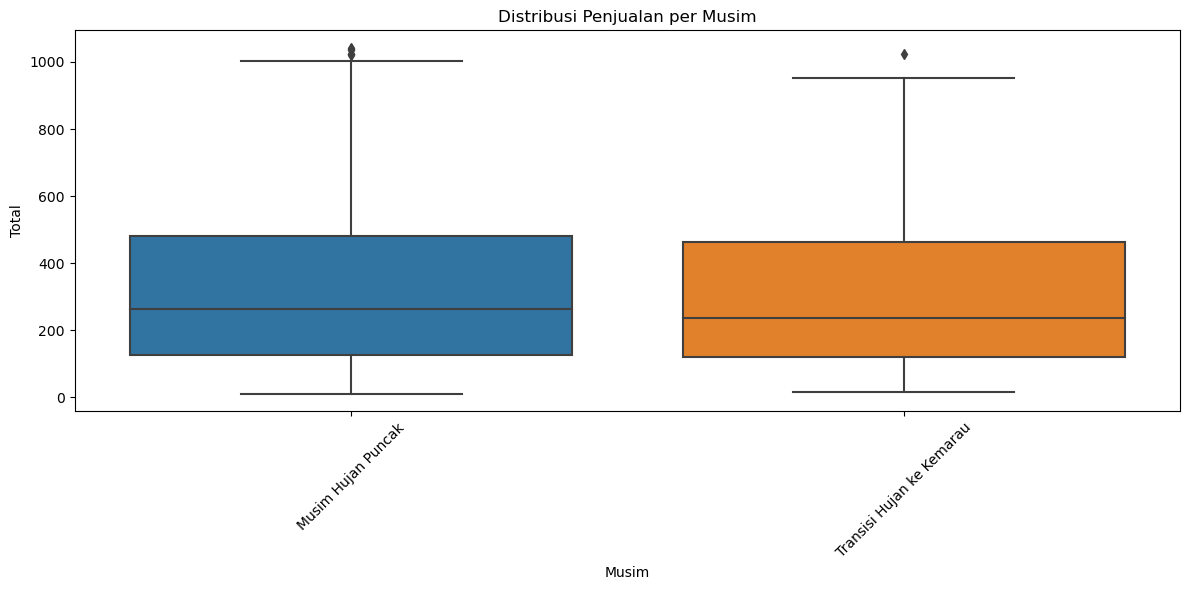

In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cara Dasar - Berdasarkan Bulan
def get_season_basic(date):
    """
    Menentukan musim berdasarkan bulan di Indonesia
    Args:
        date: timestamp atau tanggal
    Returns:
        string: nama musim
    """
    month = pd.to_datetime(date).month
    
    if month in [10, 11, 12, 1, 2, 3]:  # Oktober-Maret
        return 'Musim Hujan'
    else:  # April-September
        return 'Musim Kemarau'

# 2. Cara Detail - Dengan Data Curah Hujan
def get_season_detailed(date, rainfall_threshold=100):
    """
    Menentukan musim berdasarkan curah hujan
    Args:
        date: timestamp atau tanggal
        rainfall_threshold: batas curah hujan (mm/bulan)
    Returns:
        string: nama musim
    """
    # Contoh data curah hujan bulanan (bisa diganti dengan data aktual)
    monthly_rainfall = {
        1: 300,  # Januari
        2: 250,
        3: 200,
        4: 150,
        5: 100,
        6: 50,
        7: 40,
        8: 30,
        9: 50,
        10: 150,
        11: 250,
        12: 300  # Desember
    }
    
    month = pd.to_datetime(date).month
    if monthly_rainfall[month] > rainfall_threshold:
        return 'Musim Hujan'
    else:
        return 'Musim Kemarau'

# 3. Cara Meteorologis - Dengan Data BMKG
def get_season_bmkg(date):
    """
    Menentukan musim berdasarkan kriteria BMKG
    Args:
        date: timestamp atau tanggal
    Returns:
        string: nama musim dan fase transisi
    """
    month = pd.to_datetime(date).month
    
    if month in [12, 1, 2]:
        return 'Musim Hujan Puncak'
    elif month in [3, 4]:
        return 'Transisi Hujan ke Kemarau'
    elif month in [5, 6, 7, 8, 9]:
        return 'Musim Kemarau'
    else:  # October & November
        return 'Transisi Kemarau ke Hujan'

# Contoh penggunaan dengan dataset
def analyze_seasonal_data(df, season_method='basic'):
    """
    Menganalisis data berdasarkan musim
    Args:
        df: DataFrame dengan kolom timestamp
        season_method: metode penentuan musim ('basic', 'detailed', 'bmkg')
    Returns:
        DataFrame dengan tambahan kolom musim
    """
    # Copy DataFrame
    df_season = df.copy()
    
    # Pastikan kolom tanggal dalam format datetime
    date_column = 'Date'  # Sesuaikan dengan nama kolom tanggal Anda
    df_season[date_column] = pd.to_datetime(df_season[date_column])
    
    # Tambahkan kolom musim sesuai metode yang dipilih
    if season_method == 'basic':
        df_season['Musim'] = df_season[date_column].apply(get_season_basic)
    elif season_method == 'detailed':
        df_season['Musim'] = df_season[date_column].apply(get_season_detailed)
    else:  # bmkg
        df_season['Musim'] = df_season[date_column].apply(get_season_bmkg)
    
    return df_season

# Contoh visualisasi hasil analisis musim
def plot_seasonal_analysis(df):
    """
    Membuat visualisasi analisis musiman
    Args:
        df: DataFrame dengan kolom Musim
    """
    # 1. Plot jumlah transaksi per musim
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Musim')
    plt.title('Jumlah Transaksi per Musim')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Plot rata-rata penjualan per musim
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Musim', y='Total')
    plt.title('Distribusi Penjualan per Musim')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Contoh penggunaan
if __name__ == "__main__":
    # Baca dataset
    df = pd.read_csv('../data/supermarket_sales.csv')
    
    # Analisis dengan metode dasar
    df_basic = analyze_seasonal_data(df, 'basic')
    print("\nAnalisis Musim - Metode Dasar:")
    print(df_basic.groupby('Musim')['Total'].describe())
    
    # Analisis dengan metode BMKG
    df_bmkg = analyze_seasonal_data(df, 'bmkg')
    print("\nAnalisis Musim - Metode BMKG:")
    print(df_bmkg.groupby('Musim')['Total'].describe())
    
    # Visualisasi
    plot_seasonal_analysis(df_basic)
    plot_seasonal_analysis(df_bmkg)